<a href="https://colab.research.google.com/github/parthrjpt/EAS555_Projects/blob/main/ProblemSet1_555.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial Setup

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf

## MNIST DataSet initialization using keras 

In [19]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
print(X.shape, y.shape,X_test.shape, y_test.shape)

# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

# !gzip -d train-images-idx3-ubyte.gz
# !gzip -d train-labels-idx1-ubyte.gz
# !gzip -d t10k-images-idx3-ubyte.gz
# !gzip -d t10k-labels-idx1-ubyte.gz

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Appending training labels to training data




In [20]:
X= X.reshape(60000,28,28)

#train_data = {}
train_data = []
i=0
while i<len(X):
  train_data.append([y[i], X[i]])
#    train_data[i]={y[i]: X[i]}
  i=i+1



In [21]:
digit_data=[]
digit=1

for ele in train_data:
  key,value=ele
  if(key==digit):
     digit_data.append(value)

## Splitting data by the label & Calculating probability of each class


In [22]:
def split_data(data,digit):
  digit_data=[]
  i=0
  j=0
  for ele in data:
    key,value=ele
    if(key==digit):
        digit_data.append(value)
        j=j+1
    i=i+1
  return np.array(digit_data)

digit_0 =split_data(train_data,0)
p0=len(digit_0)/60000
digit_1 =split_data(train_data,1)
p1=len(digit_1)/60000
digit_2 =split_data(train_data,2)
p2=len(digit_2)/60000
digit_3 =split_data(train_data,3)
p3=len(digit_3)/60000
digit_4 =split_data(train_data,4)
p4=len(digit_4)/60000
digit_5 =split_data(train_data,5)
p5=len(digit_5)/60000
digit_6 =split_data(train_data,6)
p6=len(digit_6)/60000
digit_7 =split_data(train_data,7)
p7=len(digit_7)/60000
digit_8 =split_data(train_data,8)
p8=len(digit_8)/60000
digit_9 =split_data(train_data,9)
p9=len(digit_9)/60000

probability =[p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]

## Defining functions to calculate mean, standard deviation, and covariance for each  class's training data

In [23]:
def average_image(ele):
    avi= ele.reshape(ele.shape[0],-1)
    avi=avi.mean(axis=0)
    avi=avi.reshape(28,28)
    return avi

def stdev_image(digitset):
    sdi= ele.reshape(ele.shape[0],-1)
    sdi=sdi.std(axis=0)
    sdi=sdi.reshape(28,28)
    return sdi

def cov_image(dataset,mean):
    for ele in dataset:
      term=ele.reshape(ele.shape[0],-1).flatten()-mean.flatten()
      img = (term)*np.transpose(term)
      arr = img/len(dataset)
    return arr

## Task 1: Calculating Mean and Standard Deviation

In [24]:
digitdata=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]

avg=[]
std=[]
for ele in digitdata:
  avg.append(average_image(ele))
  std.append(stdev_image(ele))

## Task 1: Plotting average and standard deviation based images for each class

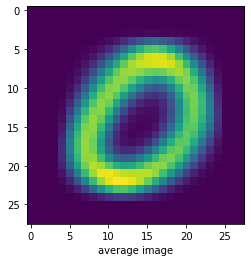

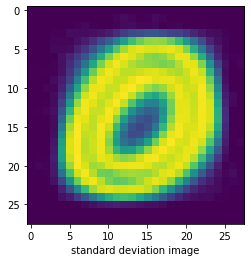

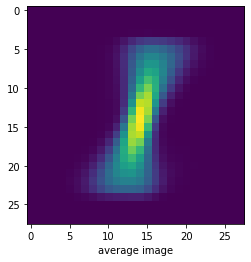

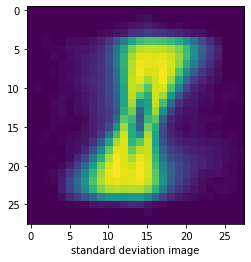

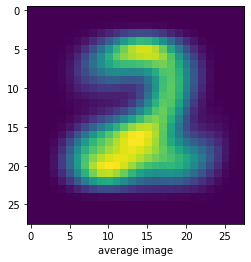

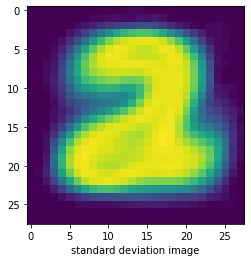

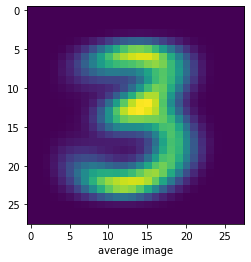

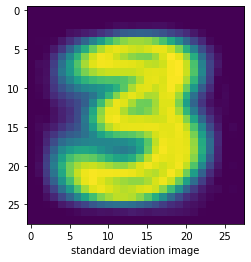

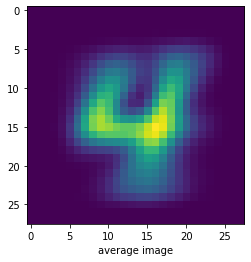

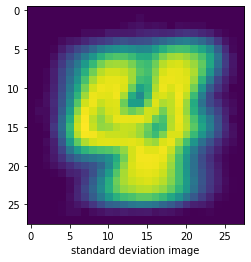

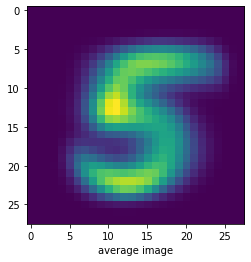

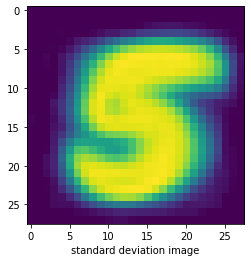

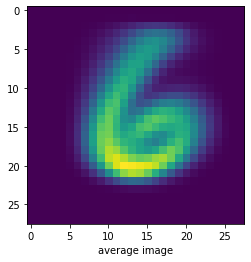

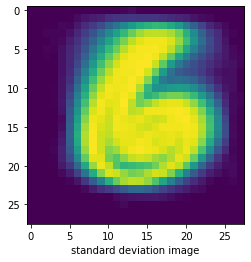

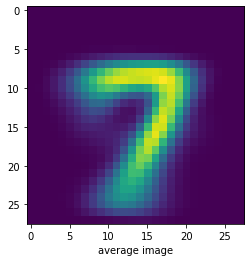

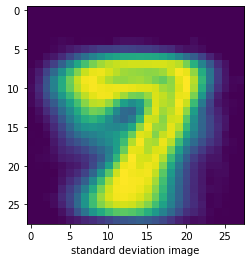

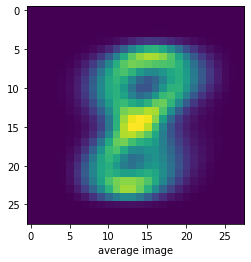

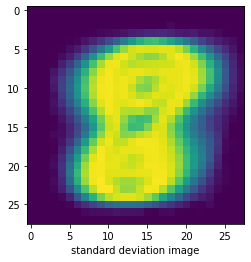

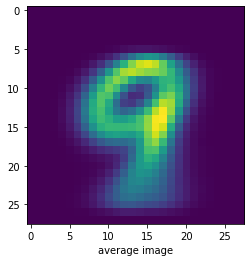

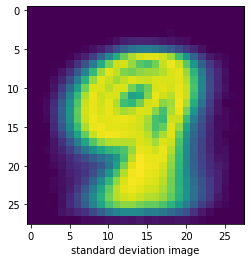

In [25]:
def plotimg(avgimg,stdimg):
  fig = plt.figure
  plt.imshow(avgimg)
  plt.xlabel("average image")
  plt.show()
  plt.imshow(stdimg)
  plt.xlabel("standard deviation image")
  plt.show()

i=0  
while i<10:
  plotimg(avg[i],std[i])
  i=i+1

## Task 2: Calculating Covariance related data for each class

In [26]:
#np.linalg.inv(cov0)
import math as mt

cov=[]
param=0.385
i=0
while i<10:
  ele=cov_image(digitdata[i],avg[i])
  cov.append(np.array(ele))
  #cov.append(np.cov(digitdata[i].reshape(len(digitdata[i]),784).T))
  i=i+1


## Task 2: Shifting The covariance matrix by a small parameter to avoid issue for determinant and log calculation

> For this usecase, the value of 0.385 was selected since it seemed to be the best fir after a few trials and errors with multiple values.



In [27]:
test_data=X_test.reshape(10000,784,1)
d=784
param=0.385
shiftedcov=[]
for ele in cov:
  shiftedcov.append(ele.reshape(784)+(param*np.eye(784)))

invcov=[]
for ele in shiftedcov:
  invcov.append(np.linalg.inv(ele))

logdet=[]
for ele in shiftedcov:
  logdet.append(np.log(np.linalg.det(ele)))


In [28]:
# print(np.array(shiftedcov).shape)
# print(shiftedcov[0])
# np.array(invcov).shape
# print(invcov[0])
# np.log(np.linalg.det(shiftedcov[0]))

## Calculation for lda, functions were initially created for each term for ease of understanding and finetuning of logic

In [29]:
# def lda_term1(ele,avg,shiftedcov):
#   #print('ele ',ele)
#   #print('avg ',avg)
#   #print(np.transpose(ele-avg).shape)
#   e=ele-avg
#   #print(e)
#   e=e.reshape(784,1)
#   term=np.dot(np.transpose(e),np.linalg.inv(shiftedcov))
#   term=0.5*np.dot(term,(e))
#   #print('term1: ',term)
#   return term 

# def lda_term2():
#   term=0.5*784*np.log(2*mt.pi)
#   #print('term2 done')
#   return term    

# def lda_term3(shiftedcov):
#   term=0.5*np.log(np.linalg.det(shiftedcov))
#   #print('term3 ', term)
#   return term    

# def lda_term4(prob):
#   term=np.log(prob)
#   #print('term4 done')
#   return term    

def lda(ele,avg,shiftedcov,invcov,logdet,prob):
  term1=0.5*np.dot(np.dot(np.transpose(ele-avg),invcov),ele-avg)
  term2=0.5*784*np.log(2*mt.pi)
  term3=0.5*logdet
  term4=np.log(prob)
  value=-term1-term2-term3+term4
  #print('value done')
  return value

## Using the lda calculated for each class for each test datapoint to determine the max inclination for predicting the output class

In [30]:
y_pred=[]

test_data=test_data.reshape(len(test_data),784)

reshapedavg=[]
for ele in avg:
  reshapedavg.append(ele.reshape(784))

#test_data
for ele in test_data :
  i=0
  ldavalue=[]
  while(i<10):
    value=lda(ele,reshapedavg[i],shiftedcov[i],invcov[i],logdet[i],probability[i])
    ldavalue.append(value)
    i=i+1
  maxincline=np.max(ldavalue)
  maxindex=ldavalue.index(maxincline)
  y_pred.append(maxindex)

In [32]:
i=0
count=0
while i<10000:
  if(y_test[i]==y_pred[i]):
    count=count+1
  i=i+1

In [33]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 4,
 9,
 0,
 0,
 9,
 0,
 1,
 3,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 2,
 3,
 3,
 3,
 2,
 4,
 4,
 6,
 3,
 5,
 3,
 2,
 5,
 4,
 1,
 9,
 8,
 7,
 8,
 9,
 2,
 7,
 5,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 8,
 1,
 7,
 3,
 7,
 8,
 7,
 9,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 8,
 3,
 1,
 4,
 5,
 1,
 6,
 9,
 6,
 0,
 5,
 4,
 4,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 7,
 5,
 6,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 9,
 1,
 8,
 2,
 0,
 8,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 3,
 4,
 5,
 1,
 4,
 4,
 7,
 3,
 3,
 2,
 1,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 3,
 9,
 2,
 3,
 0,
 5,
 1,
 5,
 0,
 9,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 7,
 5,
 7,
 2,
 4,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 3,
 3,
 8,
 4,
 2,
 6,
 0,
 2,
 4,
 2,


In [34]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [35]:
count

8129